<a href="https://colab.research.google.com/github/Shivani11032006/Daily-work/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = "/content/Wholesale customers data.csv"

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [ ]:
array=df.values

In [18]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [25]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1)

In [26]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
c1

,cluster
0,0
1,0
2,-1
3,0
4,-1
...,...
435,-1
436,0
437,-1
438,0


In [ ]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [ ]:
pd.concat([df,c1],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,-1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,0


In [19]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


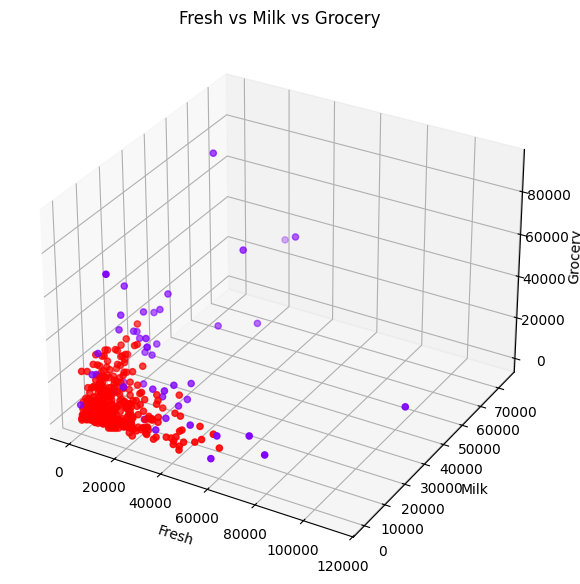

In [27]:
fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs = df['Fresh'], ys = df['Milk'], zs = df['Grocery'], c = c1['cluster'], cmap = 'rainbow')
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
ax.set_title('Fresh vs Milk vs Grocery')
plt.show()

In [23]:
pd.concat([df,c1],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,-1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,0


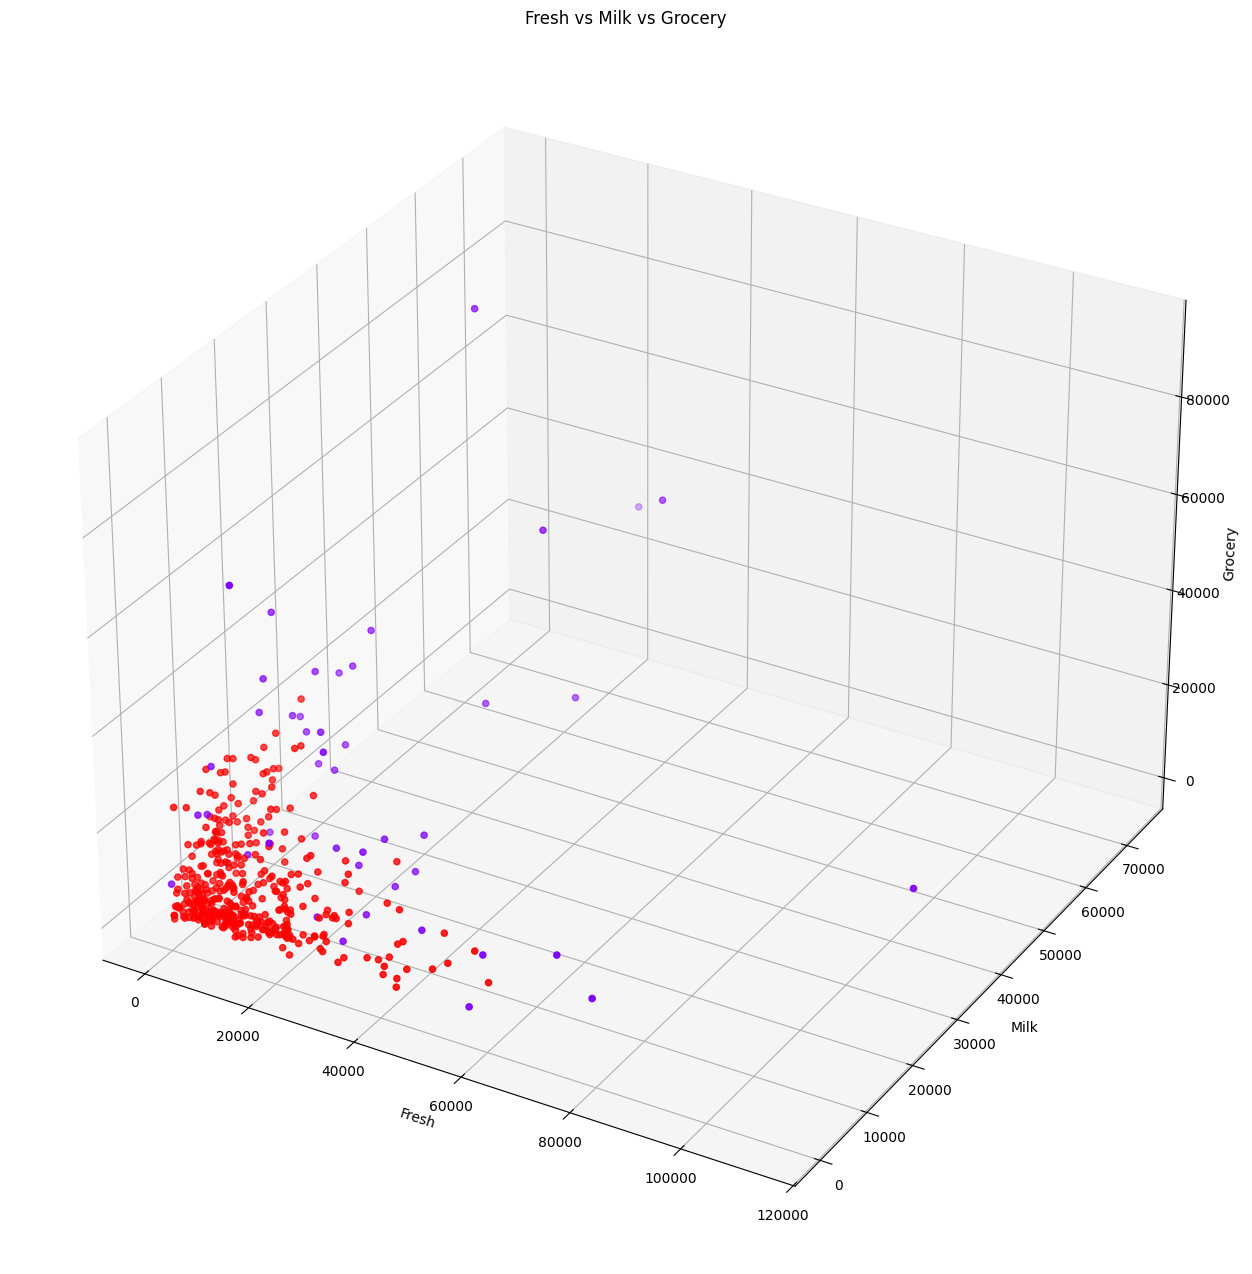

In [32]:
fig = plt.figure(figsize = (20, 16))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs = df['Fresh'], ys = df['Milk'], zs = df['Grocery'], c = c1['cluster'], cmap = 'rainbow')
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
ax.set_title('Fresh vs Milk vs Grocery')
plt.show()